In [1]:
import pandas as pd 
pd.set_option('display.max_colwidth', None)
from src.utils import ConfigManager, SerializationManager, DataLoaderAndValidator, VisualizeData
import numpy as np

# 1. Configuration File

In [2]:
# Path Config
CONFIG_PATH = 'config/config.yaml'
config_manager = ConfigManager(config_path=CONFIG_PATH)
config = config_manager.load_config()

# 2. Deserialized Data

In [3]:
# Load serilization manager
serilization_manager = SerializationManager(config=config)
# Deserialize processed data train
X_train = serilization_manager.deserialize_data('X_train')
y_train = serilization_manager.deserialize_data('y_train')

Deserialized data loaded from data/processed/X_train.pkl
Deserialized data loaded from data/processed/y_train.pkl


# 3. Get and Validate Report from Dataset

In [4]:
# Get report of data
dataloader_validator = DataLoaderAndValidator(config=config)
dataloader_validator.get_report(X_train) 

Duplicated rows: 118
Data shape: (26064, 11)

Data Overview:
--------------------------------------------------


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
32377,RENT,PERSONAL,C,Y,64,46000,2.0,4800,11.09,0.10,24
1338,OWN,DEBTCONSOLIDATION,E,N,26,26000,0.0,8500,16.45,0.33,3
7047,MORTGAGE,PERSONAL,C,Y,23,51000,3.0,16000,13.11,0.31,3
8225,MORTGAGE,MEDICAL,A,N,22,56004,6.0,6000,7.88,0.11,4
7178,RENT,PERSONAL,C,N,24,79000,3.0,7000,12.54,0.09,3


,column_name,data_type,unique_count,unique_values,missing_count,missing_percentage
0,person_home_ownership,object,4,"[RENT, OWN, MORTGAGE, OTHER]",0,0.0%
1,loan_intent,object,6,"[PERSONAL, DEBTCONSOLIDATION, MEDICAL, HOMEIMPROVEMENT, VENTURE, EDUCATION]",0,0.0%
2,loan_grade,object,7,"[C, E, A, B, D, F, G]",0,0.0%
3,cb_person_default_on_file,object,2,"[Y, N]",0,0.0%
4,person_age,int64,56,"[64, 26, 23, 22, 24, 27, 34, 39, 21, 32, 40, 29, 30, 28, 44, 41, 25, 31, 37, 38, 33, 35, 36, 45, 43, 53, 46, 42, 47, 55, 52, 51, 49, 58, 50, 65, 48, 54, 66, 20, 57, 69, 70, 61, 123, 76, 56, 73, 59, 62, 60, 84, 78, 144, 63, 94]",0,0.0%
5,person_income,int64,3708,"[46000, 26000, 51000, 56004, 79000, 75000, 45000, 65200, 36000, 80000, 76000, 78000, 20000, 38000, 54996, 57000, 58800, 129996, 96000, 37000, 15000, 270000, 33100, 35000, 122500, 225000, 69000, 39000, 67000, 43000, 12000, 54400, 30000, 102000, 24960, 65000, 30873, 50000, 51873, 61200, 110000, 58000, 98000, 31200, 32000, 90000, 70000, 40000, 100505, 60000, 66960, 58977, 94837, 78500, 67450, 40700, 24840, 27396, 73164, 14400, 27200, 25200, 72000, 26400, 47000, 52000, 150000, 68000, 43500, 24000, 62500, 44000, 51992, 67870, 72500, 71000, 55000, 20640, 45840, 95000, 66000, 74000, 250000, 34000, 17040, 19200, 77000, 29004, 108000, 101000, 115500, 34560, 115800, 63719, 140000, 29120, 109000, 105000, 89532, 15360, ...]",0,0.0%
6,person_emp_length,float64,36,"[2.0, 0.0, 3.0, 6.0, 11.0, 13.0, 1.0, 18.0, 8.0, 4.0, 7.0, 5.0, 14.0, 28.0, 9.0, 15.0, 10.0, nan, 12.0, 22.0, 24.0, 16.0, 23.0, 26.0, 21.0, 17.0, 19.0, 20.0, 27.0, 25.0, 38.0, 29.0, 123.0, 41.0, 30.0, 31.0, 34.0]",717,2.75%
7,loan_amnt,int64,708,"[4800, 8500, 16000, 6000, 7000, 10000, 4000, 8000, 5000, 5600, 6150, 3200, 15000, 3000, 25000, 4200, 5500, 3600, 21000, 9000, 10750, 6100, 35000, 10625, 12000, 2000, 2500, 20000, 2800, 6500, 6400, 1500, 23400, 14400, 9600, 20400, 11500, 1000, 6950, 3500, 10800, 10400, 7750, 2400, 18000, 10200, 7500, 10600, 8175, 18500, 24000, 6600, 1600, 3900, 2700, 11000, 5100, 3250, 8400, 1800, 2125, 7200, 6250, 4250, 7450, 14125, 15600, 17000, 3725, 8875, 14000, 19400, 16800, 13000, 19200, 6650, 27050, 10375, 4400, 4600, 6125, 9925, 29800, 15250, 3950, 9900, 6300, 3750, 11275, 12950, 7150, 6900, 5650, 7700, 6075, 22000, 11400, 28000, 12800, 5400, ...]",0,0.0%
8,loan_int_rate,float64,343,"[11.09, 16.45, 13.11, 7.88, 12.54, nan, 13.92, 6.92, 12.68, 13.43, 6.03, 7.14, 8.9, 12.42, 6.54, 10.0, 11.71, 10.75, 13.61, 15.31, 15.95, 11.26, 14.26, 10.99, 10.65, 16.95, 8.49, 5.99, 13.49, 7.43, 7.51, 14.27, 15.27, 13.99, 9.63, 11.14, 9.32, 11.11, 11.49, 8.0, 7.9, 17.56, 11.99, 7.49, 6.91, 6.76, 10.36, 16.02, 7.66, 15.96, 6.62, 17.27, 11.83, 13.22, 14.74, 13.98, 13.79, 14.72, 8.59, 12.61, 9.99, 7.29, 11.36, 9.7, 13.48, 7.75, 14.22, 15.65, 8.94, 12.18, 10.25, 16.82, 12.53, 16.77, 12.69, 15.23, 12.99, 16.29, 11.86, 11.48, 14.96, 14.35, 5.42, 9.91, 10.59, 10.37, 10.38, 12.87, 10.74, 16.96, 5.79, 15.62, 14.91, 17.99, 11.59, 16.35, 15.7, 15.33, 16.0, 8.38, ...]",2479,9.51%
9,loan_percent_income,float64,75,"[0.1, 0.33, 0.31, 0.11, 0.09, 0.13, 0.12, 0.14, 0.07, 0.08, 0.25, 0.27, 0.05, 0.19, 0.04, 0.15, 0.24, 0.2, 0.22, 0.28, 0.16, 0.51, 0.55, 0.35, 0.17, 0.03, 0.32, 0.06, 0.5, 0.46, 0.18, 0.01, 0.48, 0.36, 0.23, 0.29, 0.3, 0.37, 0.4, 0.21, 0.42, 0.41, 0.26, 0.39, 0.43, 0.02, 0.38, 0.34, 0.57, 0.47, 0.63, 0.54, 0.44, 0.45, 0.52, 0.49, 0.59, 0.53, 0.56, 0.64, 0.7, 0.68, 0.67, 0.77, 0.65, 0.61, 0.6, 0.69, 0.72, 0.0, 0.71, 0.58, 0.78, 0.66, 0.76]",0,0.0%


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,26064,26064,26064,26064
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,13150,5144,8615,21514


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,26064.000000,2.606400e+04,25347.000000,26064.000000,23585.000000,26064.000000,26064.000000
mean,27.764695,6.617184e+04,4.787233,9601.073320,11.010116,0.170446,5.816720
std,6.392500,6.359933e+04,4.109243,6315.753396,3.228901,0.106991,4.054342
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.900000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.950000e+04,7.000000,12250.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,22.480000,0.780000,30.000000


In [5]:
df = pd.concat([X_train, y_train], axis=1)
df.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file', 'person_age', 'person_income',
       'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [6]:
# Validate Data
dataloader_validator.validate_data(df)

Validation errors found:
 - Column 'person_age' has values above maximum of 100
 - Column 'person_emp_length' has type 'float64', expected 'integer'
 - Column 'person_emp_length' has values above maximum of 50


In [7]:
# Check distribution of numeric features
numeric_features = config.get('features', {}).get('numerical', [])
numeric_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

# 4. Visualize Numerical Data

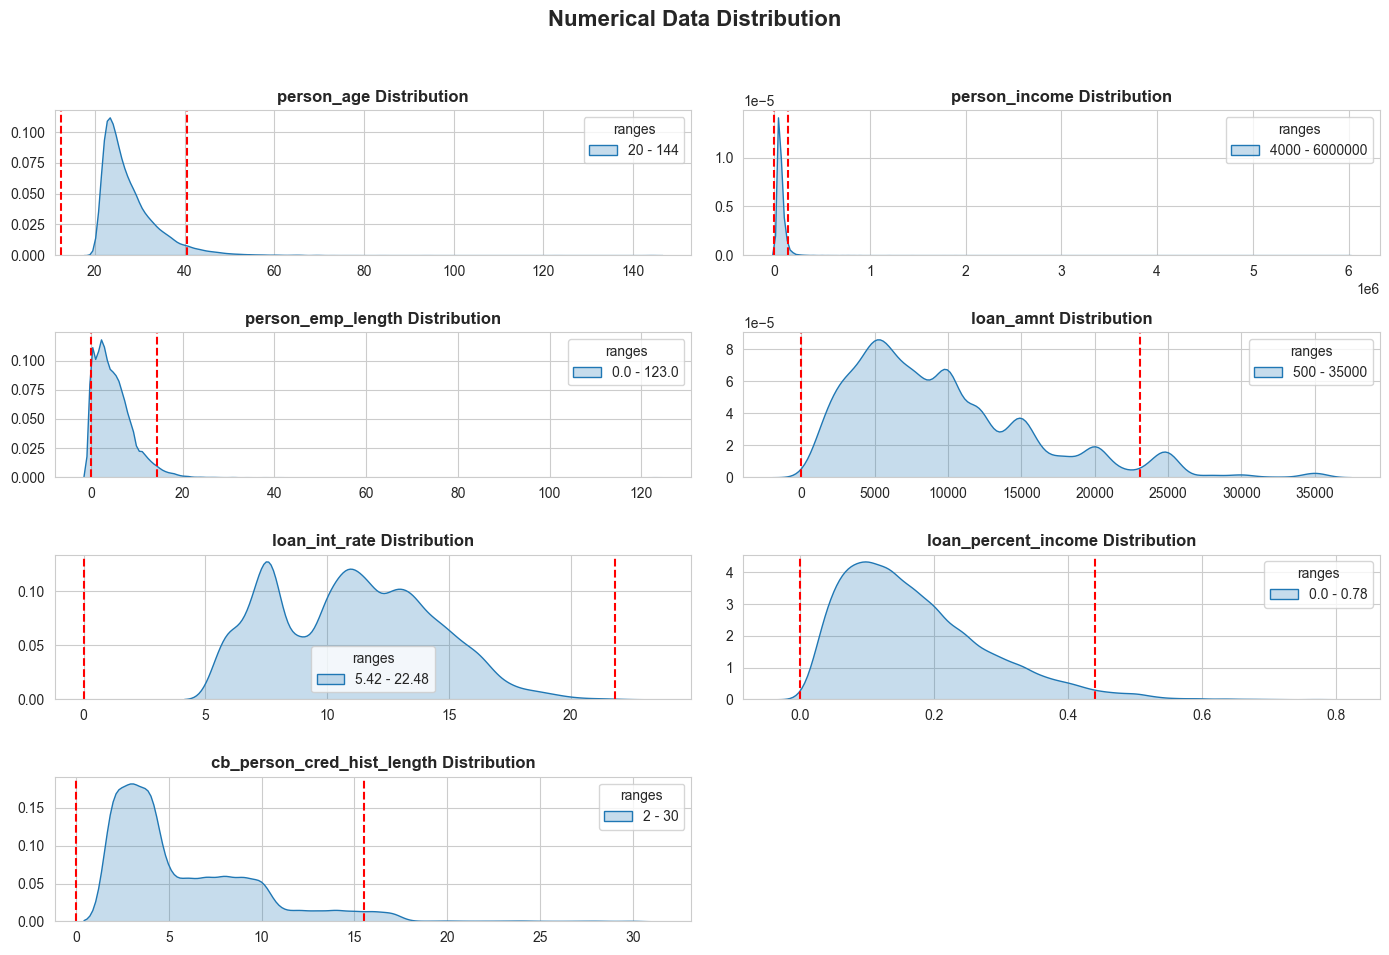

In [8]:
visualizer = VisualizeData(config=config)

visualizer.plot_numeric_distributions(data=df, title='Numerical Data Distribution', check_outliers=True)

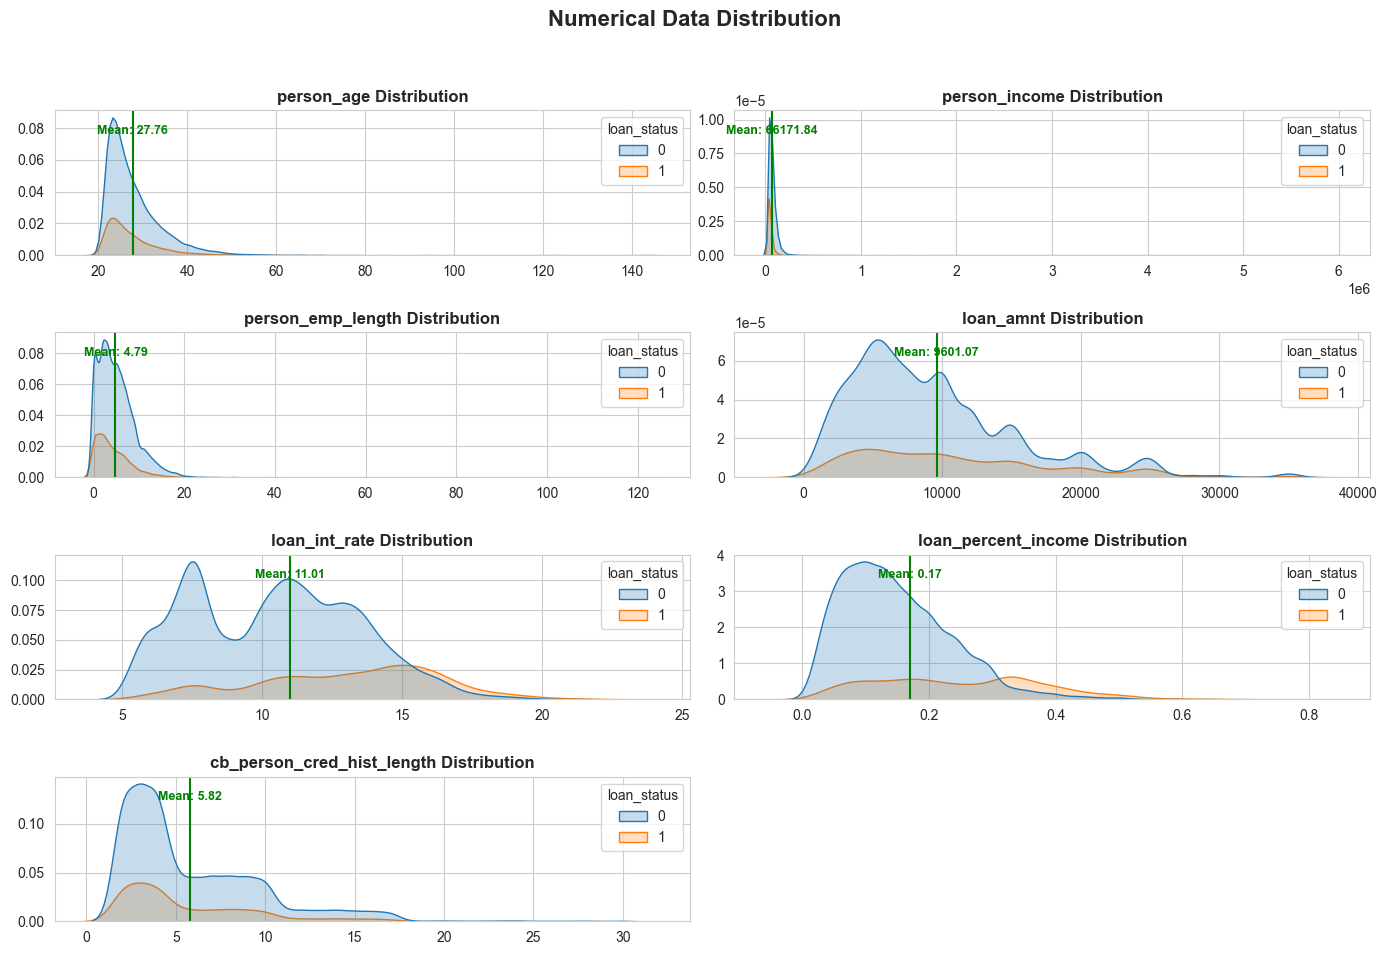

In [9]:
visualizer.plot_numeric_distributions(data=df, title='Numerical Data Distribution', vline_mean=True, hue='loan_status')

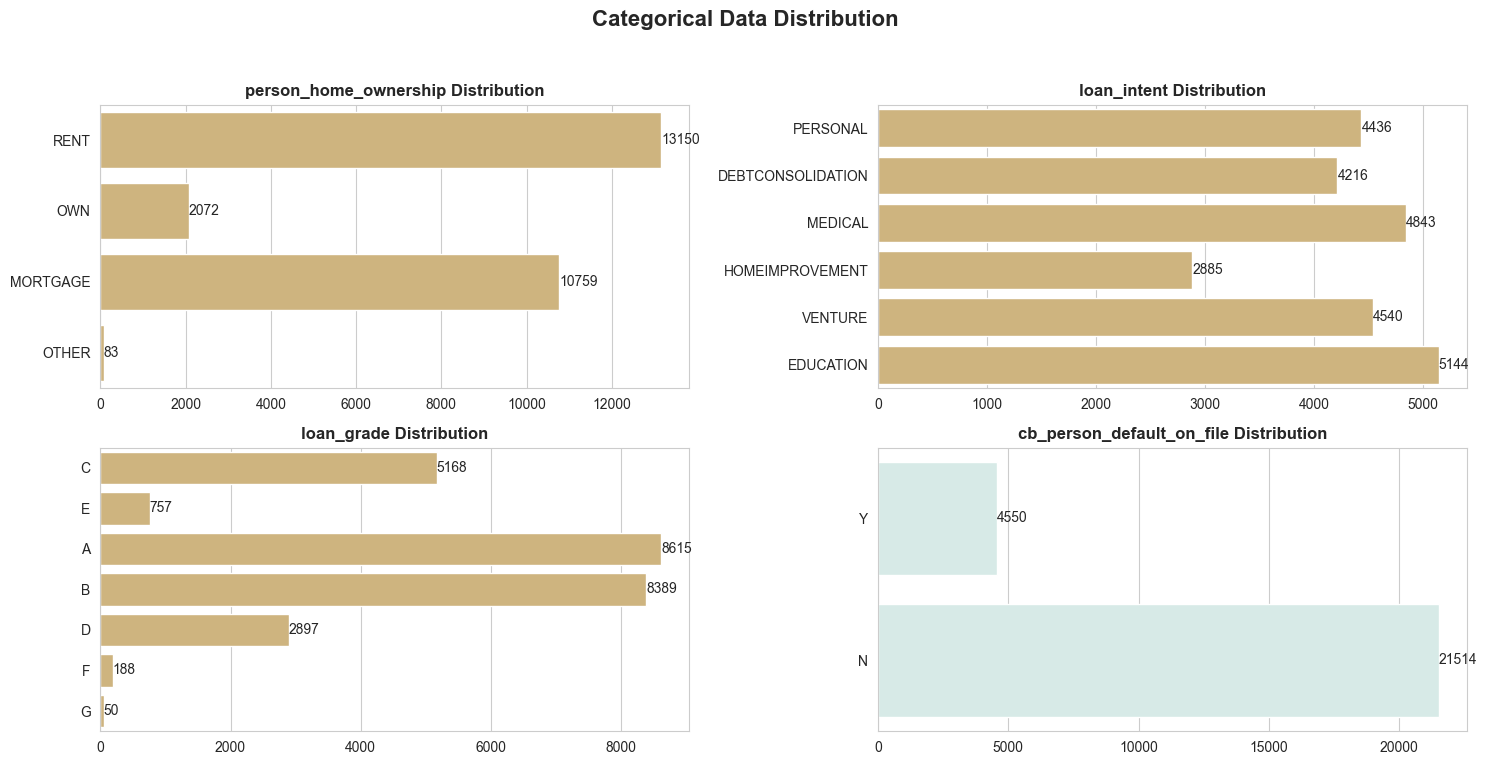

In [10]:
visualizer.plot_categorical_distributions(data=df, title='Categorical Data Distribution')

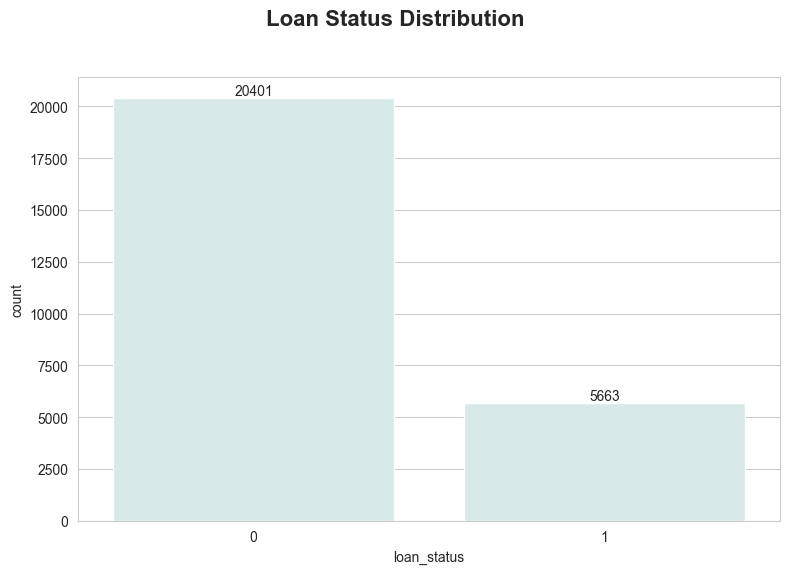

In [11]:
# Check distribution of target features
visualizer.plot_categorical_distributions(data=df, title='Loan Status Distribution', check_target=True)

**Insight**

1. Data x_train memiliki 118 row data yang duplikat dan juga terdapat missing value pada kolom `person_emp_length` sebanyak 717 baris data atau sebesar 2.75% dari keseluruhan data, lalu kolom `loan_int_rate` juga memiliki missing value sebanyak 2479 baris data atau 9.51% dari keseluruhan data.
2. Untuk data invalid terdapat pada kolom `person_age` yang nilainya lebih dari 100 dan `person_emp_length` yang nilainya lebih besar dari 50 dan memiliki tipe data float, sedangkan yang diharapkan tipe datanya adalah integer.
3. Data numerical kebanyakan memiliki distribusi right skewed dan mengandung outliers, kita tidak akan menghapus data outliers tersebut karena ingin mempertahankan data sesungguhnya berdasarkan keadaan dunia nyata. Kemudian distribusi label atau `loan_status` terdapat imbalanced class. Maka dari itu outliers akan ditetap dipertahankan dengan kombinasi uji coba menggunakan `log_transform` dan penskalaan `RobustScaler`, kemudian imbalanced data akan diatasi dengan teknik resampling seperti `SMOTE` dan `ENN`. Sedangkan untuk missing value dikarenakan mayoritas data rightskewed maka data iisi dengan median dari nilai kolom tersebut.